# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [ ]:
# Import necessary libraries
from google.colab import drive
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Data

In [ ]:
# Load the Data
import zipfile

unlabelled_data_path = "/content/drive/MyDrive/Sound/unlabelled_sounds.zip"
extracted_path = "/content/unlabelled_sounds" # Path to extract the zip file

# Extract the zip file
with zipfile.ZipFile(unlabelled_data_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

### Extract relevant features Mel Spectrogram

In [ ]:
#Loading data with Librosa
sound_data = librosa.util.find_files(extracted_path)

features = []
#Extract Features
for file in sound_data:
    signal, sr = librosa.load(unlabelled_data_path + sound_data)
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
    features.append(np.mean(mfccs.T, axis=0))

features_array = np.array(features)

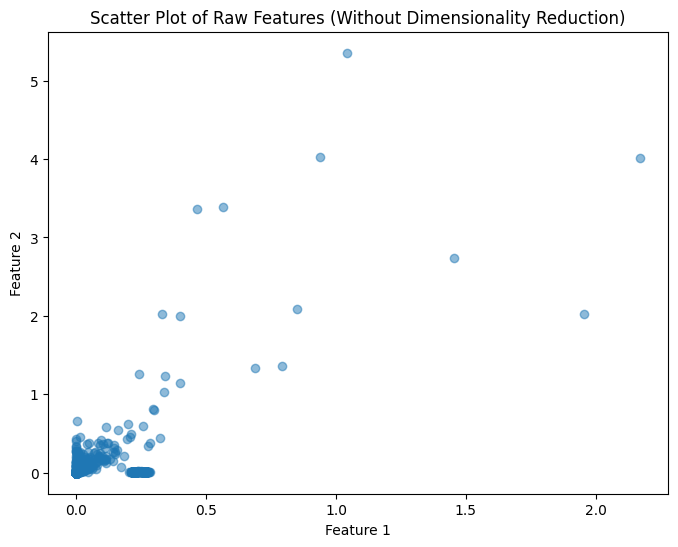

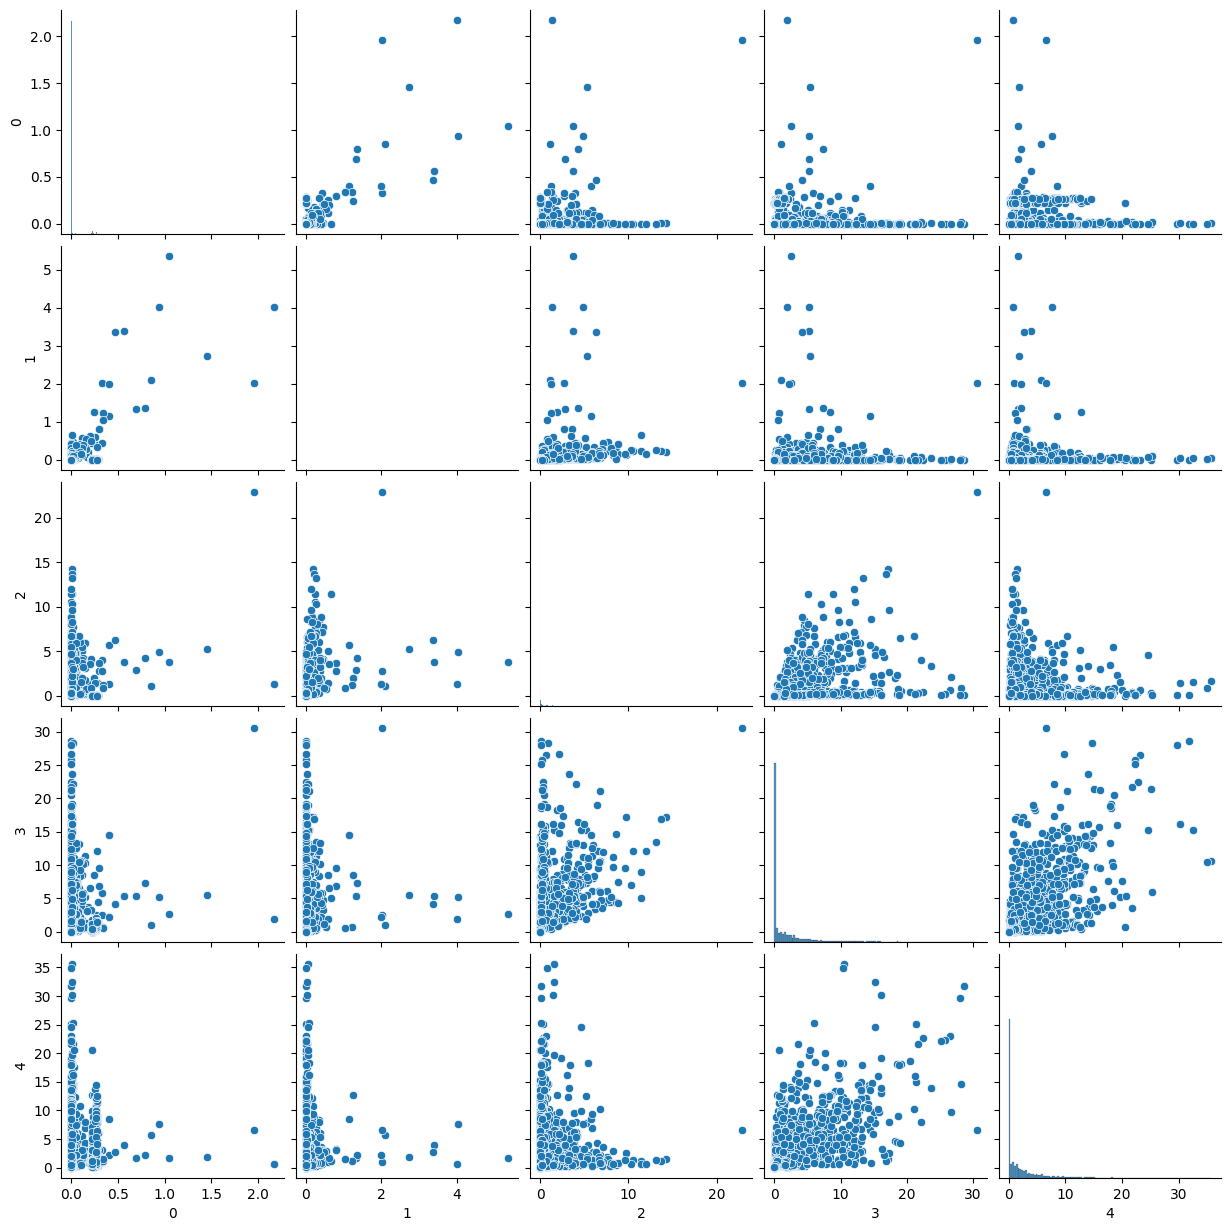

In [ ]:

# Scatter plot (Attempt without dimensionality reduction)
plt.figure(figsize=(8,6))
plt.scatter(features_array[:, 0], features_array[:, 1],alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

# Pair plot (Only using first 5 features)
df = pd.DataFrame(features_array[:, :5])
sns.pairplot(df)
plt.show()

### Why is dimensionality reduction important?
(*Document any challenges/errors from the above experiments.*)

When I did the  the initial scatter plot visualization and pair plot of the raw features, it is evident that visualizing and understanding the relationships between features in high-dimensional space is challenging.

* The scatter plot without dimensionality reduction showed a dense cloud of points, making it impossible to discern any potential clusters. The pair plot, while showing some pairwise relationships for the first 5 features, still didn't provide a clear picture of the overall data structure or potential groupings.
* This difficulty in visualization and the computational complexity of working with many features highlight the importance of dimensionality reduction techniques like PCA and t-SNE for simplifying the data and making it more amenable to analysis and visualization.

* Dimensionality helps to prevent overfitting with few features models are less likely to memorize the training data and overfit. This helps the model generalize better to new, unseen data improve its ability to make accurate predictions.

In summary, dimensionality reduction is essential for overcoming the challenges of high-dimensional data, as demonstrated by the cluttered and uninterpretable visualizations of the raw features. By reducing dimensions, we can reveal hidden patterns, improve clustering accuracy, and make the data more manageable.

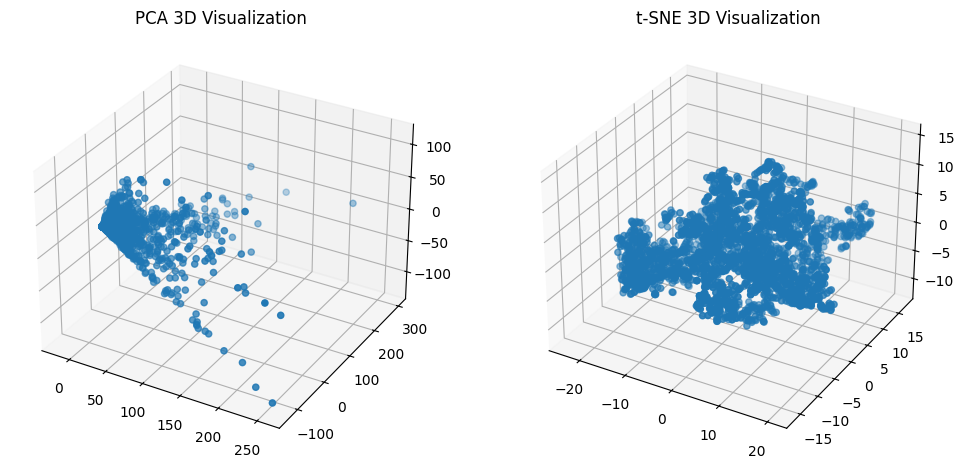

In [ ]:
# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_array)

# Apply t-SNE (3 components)
tsne = TSNE(n_components=3, random_state=42)
features_tsne = tsne.fit_transform(features_array)

# 3D Visualization
fig = plt.figure(figsize=(12, 6))

# PCA 3D Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2])
ax1.set_title("PCA 3D Visualization")

# t-SNE 3D Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2])
ax2.set_title("t-SNE 3D Visualization")

plt.show()


### Which method (PCA or t-SNE) provides better separability of clusters and why?
(*Write based on your visualizations.*)

Based on the 3D visualizations, t-SNE appears to provide better separability of clusters compared to PCA.

*   **PCA Visualization:** The PCA plot shows a more spread-out distribution of data points, but distinct clusters are not clearly visible. The data seems to form a general cloud without clear boundaries between potential groups.
*   **t-SNE Visualization:** The t-SNE plot, on the other hand, shows some signs of grouping, with data points appearing to form denser regions that are somewhat separated from each other. This suggests that t-SNE was more effective in preserving the local structure of the data and highlighting potential clusters.

PCA, while useful for dimensionality reduction and capturing global variance, doesn't prioritize preserving these local relationships, which are often crucial for visualizing clusters. PCA creates new features where it my lead to not good visualization and overlapping with each other and the original data.

In Summarry, t-SNE is generally better at visualizing clusters in high-dimensional data because it focuses on preserving local relationship, meaning that points that are close together in the original high-dimensional space are likely to remain close together in the lower-dimensional t-SNE space.

###The Elbow Method  and Silhouette

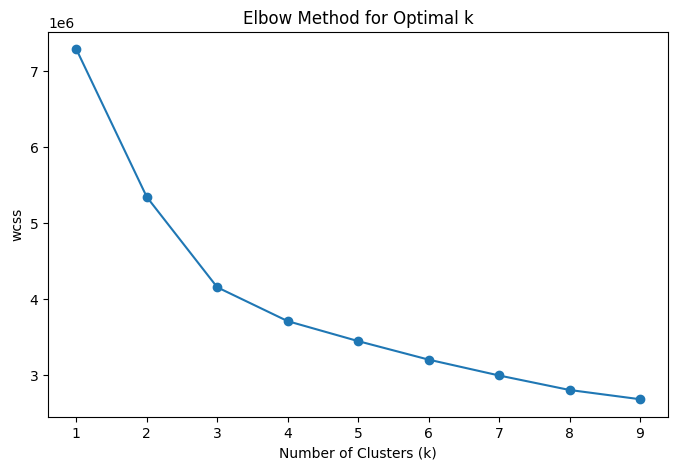

In [ ]:
# Optimize number of clusters using Elbow Method
inertia = []
k_range = range(1, 10)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_array)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("wcss")
plt.title("Elbow Method for Optimal k")
plt.show()


k=2: Silhouette Score = 0.6953, Inertia = 5336627.0000
k=3: Silhouette Score = 0.7005, Inertia = 4148107.0000
k=4: Silhouette Score = 0.4869, Inertia = 3702278.5000
k=5: Silhouette Score = 0.4896, Inertia = 3439454.5000
k=6: Silhouette Score = 0.4694, Inertia = 3195519.0000
k=7: Silhouette Score = 0.4873, Inertia = 2966721.2500
k=8: Silhouette Score = 0.4486, Inertia = 2797757.2500
k=9: Silhouette Score = 0.4497, Inertia = 2666925.5000
k=10: Silhouette Score = 0.4548, Inertia = 2548651.5000


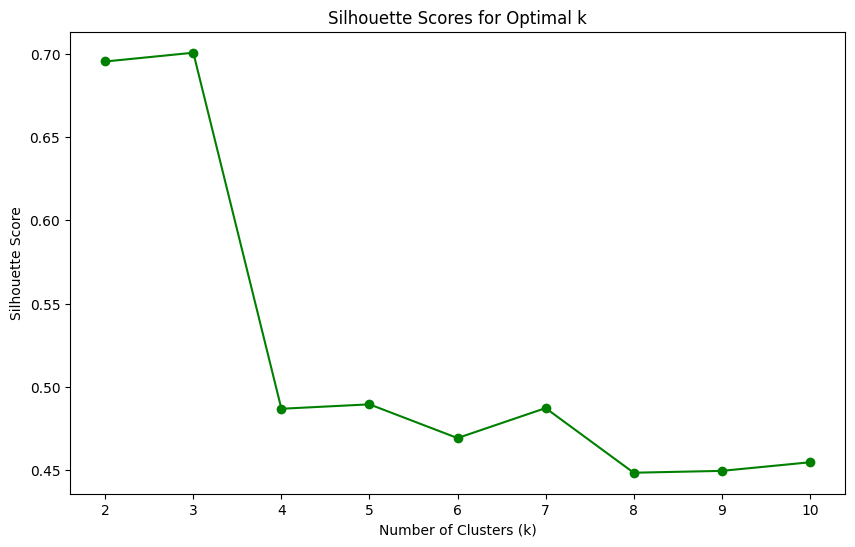

In [ ]:
silhouette_scores = []
inertia_scores = [] # Add list to store inertia
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_array)
    score = silhouette_score(features_array, kmeans.labels_)
    silhouette_scores.append(score)
    inertia_scores.append(kmeans.inertia_) # Append inertia

    print(f"k={k}: Silhouette Score = {score:.4f}, Inertia = {kmeans.inertia_:.4f}")

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


### Comparing K-means and DBSCAN



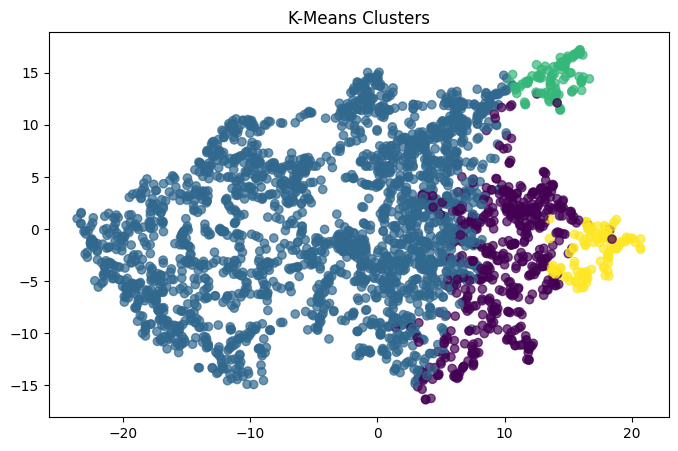

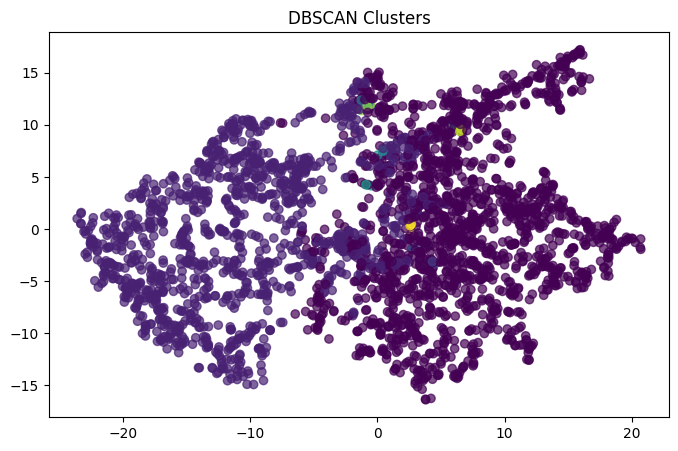

In [ ]:
# Select optimal K based on elbow method (e.g., k=3
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features_array)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(features_array)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne [:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clusters")
plt.show()

# Scatter Plot for DBSCAN Clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title("DBSCAN Clusters")
plt.show()




In [ ]:

# Evaluate clustering
kmeans_silhouette = silhouette_score(features_array, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features_array, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_array, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(features_array, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.4868, Davies-Bouldin Index: 1.4485
DBSCAN - Silhouette Score: -0.0305, Davies-Bouldin Index: 1.8554


### Discuss the results (max 5 lines)
(*Compare K-Means and DBSCAN performance based on the outputs.*)

The results of the evaluation metrics Indicates that, K-Means performed significantly better than DBSCAN. The K-Means clustering resulted in a high silhouette score (0.4868) and a lower Davies-Bouldin index (1.4485), indicating well-separated and compact clusters. In contrast, DBSCAN produced a negative silhouette score (-0.0305) and a higher Davies-Bouldin index (1.8554), suggesting that it failed to form meaningful clusters with the chosen parameters.The Elbow Method graph suggests an optimal k of around 3, reinforcing that K-Means is more suitable for this dataset than DBSCAN.

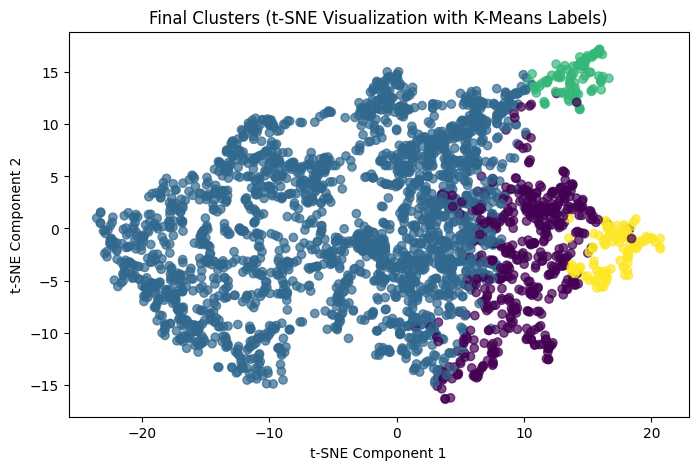

In [ ]:

# Final visualization using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()


### Final Analysis
- Explain why dimensionality reduction helped (or didn't) in clustering.
- Justify why certain clustering methods worked better.
- Relate findings to real-world clustering challenges.

Here's a breakdown of the final analysis:

1.  **Why Dimensionality Reduction was Helpful:** Dimensionality reduction, particularly t-SNE, was crucial for visualizing the structure within the high-dimensional sound data. Without it, as seen in the initial plots, the data points were a dense cloud, making it impossible to visually identify potential clusters. t-SNE's ability to preserve local relationships in the data allowed for a more interpretable 3D visualization where some groupings became apparent. in the data that were hidden before.

2.  **Why K-Means Worked Better:**I tried two ways to group the data: K-Means and DBSCAN. K-Means was better because it found clear, well-separated groups. Think of it like sorting marbles into distinct piles. DBSCAN, which is good at finding irregularly shaped groups and noise, didn't work as well here, suggesting our sound data had more defined clusters that K-Means could easily identi.

3. **Real-World Connections (Customer Segmentation)**: These techniques are useful beyond sounds and use it in Customer Segmentation to identifying distinct customer groups based on demographics, purchase history, and behavior is crucial for targeted marketing. However, customer data is often high-dimensional and may contain noise, requiring careful handling of outliers and algorithm selection. Just like we needed to simplify the sound data, customer data can also be complex, so dimensionality reduction helps. And choosing the right grouping method (like K-Means for clear groups or DBSCAN for more spread-out ones) is key to making smart decisions in marketing, like knowing which customer groups to target with specific campaigns.